In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 데이터확인

In [25]:
# TODO: 데이터 불러와서 확인하기
rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')

In [4]:
rocket.head(2)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN


In [6]:
rocket.info() # 결측치 너무 많다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [10]:
rocket.isnull().sum().sort_values() #드랍할 열 확ㅇ니

Date                              0
Location                          0
High Temp                         1
Low Temp                          1
Hist Ave Temp                     1
Hist Low Temp                     1
Hist High Temp                    1
Ave Temp                          1
Hist Ave Percipitation            1
Percipitation at Launch Time      1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Sea Level Pressure                1
Day Length                        2
Condition                         2
Launched?                       240
Name                            240
Crewed or Uncrewed              240
Time (East Coast)               241
Temp at Launch Time             241
Wind Speed at Launch Time       241
Notes                           297
Hist Ave Max Wind Speed         300
Hist Ave Sea Level Pressure     300
Hist Ave Visibility             300
dtype: int64

#### 전처리: 결측치 처리및 문자열데이터 인코딩

In [54]:
# 전체가 누락된 컬럼 : 'Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure'
# 날씨와 무관한 컬럼 : 'Name','Date',Time (East Coast)','Location','Day Length','Notes', 'Sea Level Pressure'
# 종속변수 : 'Launched?'

In [ ]:
# 적당한 값으로 결측치 처리
# crewed = Uncrewed로
# Launche? = N
# Wind Direction = Unknown
# Condition = Cloudy
# 기타는 중앙값 또는 최빈값


In [25]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                300 non-null    object 
 12  Max Wind Speed                299 non-null    float64
 13  Visib

In [26]:
rocket['Crewed or Uncrewed'] = rocket['Crewed or Uncrewed'].fillna('Uncrewed')
rocket['Crewed or Uncrewed'].value_counts()

Crewed or Uncrewed
Uncrewed    284
Crewed       16
Name: count, dtype: int64

In [27]:
rocket['Wind Direction'] = rocket['Wind Direction'].fillna('Unknown')
rocket['Wind Direction'].value_counts()

Wind Direction
E          80
W          54
NE         42
SE         38
S          28
NW         25
N          19
SW         13
Unknown     1
Name: count, dtype: int64

In [28]:
rocket['Condition'].value_counts()

Condition
Cloudy            113
Partly Cloudy      68
Fair               68
Rain               24
T-Storm            12
Thunder             7
Mostly Cloudy       2
Windy               1
Partly Cloudly      1
Light Rain          1
Heavy T-Storm       1
Name: count, dtype: int64

In [29]:
rocket['Condition'] = rocket['Condition'].fillna('Cloudy')
rocket['Condition'].value_counts()

Condition
Cloudy            115
Partly Cloudy      68
Fair               68
Rain               24
T-Storm            12
Thunder             7
Mostly Cloudy       2
Windy               1
Partly Cloudly      1
Light Rain          1
Heavy T-Storm       1
Name: count, dtype: int64

In [30]:
mode_val = rocket['High Temp'].mode()[0]
rocket['High Temp'] = rocket['High Temp'].fillna(mode_val)

In [31]:
float_cols = rocket.select_dtypes(include='float64').columns
float_cols

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Max Wind Speed', 'Visibility', 'Wind Speed at Launch Time',
       'Hist Ave Max Wind Speed', 'Hist Ave Visibility',
       'Hist Ave Sea Level Pressure'],
      dtype='object')

In [32]:
rocket[float_cols] = rocket[float_cols].apply(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [33]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            300 non-null    object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     300 non-null    float64
 7   Low Temp                      300 non-null    float64
 8   Ave Temp                      300 non-null    float64
 9   Temp at Launch Time           300 non-null    float64
 10  Hist High Temp                300 non-null    float64
 11  Hist Low Temp                 300 non-null    float64
 12  Hist Ave Temp                 300 non-null    float64
 13  Perci

##### 종속변수의 null 처리 : NaN -> 'N'


In [34]:
rocket['Launched?'].value_counts()

Launched?
Y    59
N     1
Name: count, dtype: int64

In [35]:
rocket['Launched?'] = rocket['Launched?'].fillna('N')
rocket['Launched?'].value_counts()

Launched?
N    241
Y     59
Name: count, dtype: int64

##### Drop

In [36]:
# 전체가 누락된 컬럼 : 'Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure'
# 날씨와 무관한 컬럼 : 'Name','Date',Time (East Coast)','Location','Day Length','Notes', 'Sea Level Pressure'

rocket = rocket.drop(['Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure','Name','Date','Time (East Coast)','Location','Day Length','Notes', 'Sea Level Pressure'],axis=1)

In [37]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Temp at Launch Time           300 non-null    float64
 6   Hist High Temp                300 non-null    float64
 7   Hist Low Temp                 300 non-null    float64
 8   Hist Ave Temp                 300 non-null    float64
 9   Percipitation at Launch Time  300 non-null    float64
 10  Hist Ave Percipitation        300 non-null    float64
 11  Wind Direction                300 non-null    object 
 12  Max Wind Speed                300 non-null    float64
 13  Visib

##### 문자 데이터 인코딩

In [38]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
rocket['Crewed or Uncrewed'] = le.fit_transform(rocket['Crewed or Uncrewed'])
rocket['Wind Direction'] = le.fit_transform(rocket['Wind Direction'])
rocket['Condition'] = le.fit_transform(rocket['Condition'])

In [39]:
rocket['Crewed or Uncrewed'].sort_values()

297    0
292    0
262    0
267    0
272    0
      ..
296    1
1      1
298    1
299    1
0      1
Name: Crewed or Uncrewed, Length: 300, dtype: int64

In [43]:
rocket['Launched?'].value_counts(dropna=False)

Launched?
0    241
1     59
Name: count, dtype: int64

In [42]:
rocket['Launched?'] = rocket['Launched?'].map({'Y':1, 'N':0})

In [44]:
rocket.sample(5)

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
178,1,0,82.0,73.0,76.96,78.0,82.0,65.0,74.0,0.0,0.14,2,17.0,10.0,12.0,0
251,1,0,93.0,78.0,85.68,78.0,91.0,73.0,82.0,0.0,0.20,2,15.0,7.0,12.0,6
103,1,0,91.0,68.0,79.58,78.0,85.0,66.0,75.0,0.0,0.08,2,16.0,10.0,12.0,0
17,1,1,76.0,49.0,62.00,54.0,78.0,59.0,69.0,0.0,0.08,1,12.0,15.0,6.0,1
295,1,0,87.0,71.0,79.36,78.0,87.0,70.0,79.0,0.0,0.15,4,20.0,10.0,12.0,9


#### 모델링

In [45]:
X = rocket.drop('Launched?', axis=1)
y = rocket['Launched?']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 15) (60, 15) (240,) (60,)


##### DecisionTree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=4,          # 과적합 방지
    random_state=42
)

dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [48]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        12

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



<Axes: >

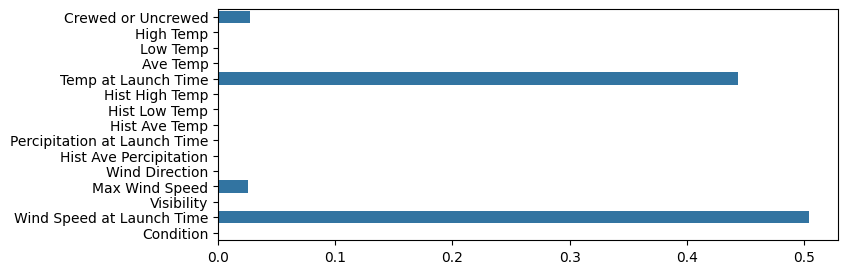

In [49]:
plt.figure(figsize=(8,3))
sns.barplot(y=dt.feature_names_in_, x=dt.feature_importances_)

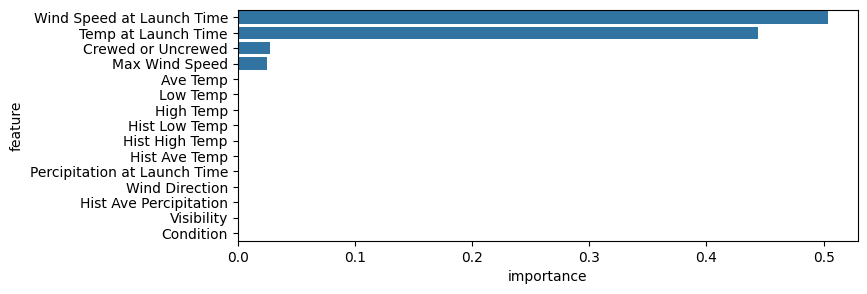

In [50]:
fi_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,3))
sns.barplot(
    data=fi_df,
    x='importance',
    y='feature'
)
plt.show()

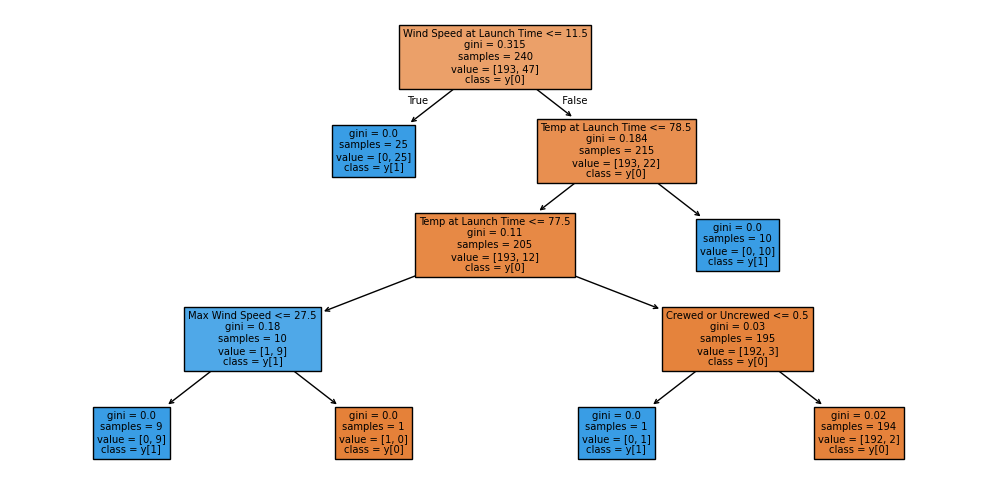

In [54]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(dt, feature_names=X_train.columns, class_names=True, filled=True,)
plt.tight_layout()
plt.show()

##### 랜덤포레스트 회귀

In [60]:
# TODO: 모델 만들고 성능 평가하기

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [61]:
print('DT모델:')
print(classification_report(y_test, y_pred))

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

print('RF모델:')
print(classification_report(y_test, rf_pred))

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

print('KNN 모델:')
print(classification_report(y_test, knn_pred))

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

print('LR모델:')
print(classification_report(y_test, lr_pred))

DT모델:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        12

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60

RF모델:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        12

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60

KNN 모델:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        48
           1       1.00      0.25      0.40        12

    accuracy                           0.85        60
   macro avg       0.92      0.62      0.66        60
weighted avg       0.87      0.85      0.81        60


In [62]:
# 교차검증 

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier()

cv_scores_accuracy = cross_val_score(model, X = X_train, y = y_train, scoring='accuracy', cv=skf)
cv_scores_f1= cross_val_score(model, X = X_train, y = y_train, scoring='f1_macro', cv=skf)

print('accuracy : ', cv_scores_accuracy, cv_scores_accuracy.mean())
print('f1 : ', cv_scores_f1, cv_scores_f1.mean())

accuracy :  [1.         0.95833333 0.97916667 1.         0.9375    ] 0.975
f1 :  [0.96425912 0.9671907  0.96425912 0.96952381 0.90157211] 0.9533609736790363


#### GridSearchCV

In [63]:
# GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

parameters = {'max_depth':[3,4,5],
              'min_samples_split':[2,4]}

gscv = GridSearchCV(model, param_grid=parameters, cv=skf, refit=True)

gscv.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [3, 4, ...], 'min_samples_split': [2, 4]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [64]:
gscv.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10, None], # max_depth: 나무의 깊이를 제한하여 과적합 방지
    'min_samples_split': [2, 5, 10, 20], # min_samples_split: 노드를 분할하기 위해 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'] # criterion: 분할 품질을 측정하는 기능 ('gini' 또는 'entropy')
}

gscv = GridSearchCV(dt, param_grid=param_grid, cv=5, refit=True)
gscv.fit(X_train, y_train)

print(gscv.best_params_)

best_dt = gscv.best_estimator_
y_pred = best_dt.predict(X_test)

print(best_dt.score(X_train, y_train))
print(best_dt.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9916666666666667
0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        12

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



In [92]:
best_model = gscv.best_estimator_
pred = best_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [98]:
out = f'''
compare DT ,RF, LR, KNN
DT : {gscv.best_score_}
RF : {rf_model.score(X_test, y_test)}
LR : {lr_model.score(X_test, y_test)}
KNN : {knn_model.score(X_test, y_test)}

DT confusion matrix : 
{classification_report(y_test, gscv.best_estimator_.predict(X_test))}

RF confusion matrix : 
{classification_report(y_test, rf_pred)}

LR confusion matrix : 
{classification_report(y_test, lr_pred)}

KNN confusion matrix :
{classification_report(y_test, knn_pred)}
'''
print(out)


compare DT ,RF, LR, KNN
DT : 0.9791666666666666
RF : 0.9833333333333333
LR : 0.9
KNN : 0.85

DT confusion matrix : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


RF confusion matrix : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        12

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60


LR confusion matrix : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        48
           1       1.00      0.50      0.67        12

    accuracy     